import pandas as pd
from database_helper import Database 

In [1]:
from database_helper import Database
import pandas as pd
import datetime
from venn import venn
%matplotlib inline
db = Database('/Users/alessiogandelli/data_social_dynamics/social_dynamics.sqlite')


# Missing userid exploration 

## get all userid from each dataset 

In [60]:

td_userid = db.query("select distinct userid from diary")
socio_userid = db.query("select distinct userid from socio")
loc_userid = db.query("select distinct userid from location")
not_userid = db.query("select distinct userid from notification")
app_userid = db.query("select distinct userid from application")
touch_userid = db.query("select distinct userid from touch")
screen_userid = db.query("select distinct userid from screen")

td_userid = set([i[0] for i in td_userid])
socio_userid = set([i[0] for i in socio_userid])
loc_userid = set([i[0] for i in loc_userid])
not_userid = set([i[0] for i in not_userid])
app_userid = set([i[0] for i in app_userid])
touch_userid = set([i[0] for i in touch_userid])
screen_userid = set([i[0] for i in screen_userid])


## Some set operations 

In [63]:
all_userid = td_userid | socio_userid | loc_userid | not_userid | app_userid | touch_userid | screen_userid

td_missing = all_userid - td_userid
socio_missing = all_userid - socio_userid
loc_missing = all_userid - loc_userid
not_missing = all_userid - not_userid
app_missing = all_userid - app_userid
touch_missing = all_userid - touch_userid
screen_missing = all_userid - screen_userid

missing_all_sensors = loc_missing & not_missing & app_missing & touch_missing & screen_missing

some_sensors_userid = all_userid - missing_all_sensors # remove missing all sensors 


useful_td_missing = some_sensors_userid - td_userid
useful_socio_missing = some_sensors_userid - socio_userid

useful_userid = some_sensors_userid - useful_td_missing - useful_socio_missing # remove missing from td and socio

useful_loc_missing = useful_userid - loc_userid
useful_not_missing = useful_userid - not_userid
useful_app_missing = useful_userid - app_userid
useful_touch_missing = useful_userid - touch_userid
useful_screen_missing = useful_userid - screen_userid



In [98]:
print('there are '+str(len(all_userid))+ ' users')
print( 'there are '+ str(len(td_userid & socio_userid & loc_userid & not_userid & app_userid & touch_userid)) + ' users with all data')

print('\nthere are '+str(len(td_userid))+ ' users with diary data')
print('there are '+str(len(socio_userid))+ ' users with socio data')
print('there are '+str(len(loc_userid))+ ' users with location data')
print('there are '+str(len(not_userid))+ ' users with notification data')
print('there are '+str(len(app_userid))+ ' users with application data')
print('there are '+str(len(touch_userid))+ ' users with touch data')
print('there are '+str(len(screen_userid))+ ' users with screen data')


print('\nthere are '+str(len(td_missing))+ ' users with missing time diary')
print('there are '+str(len(socio_missing))+ ' users with missing socio')
print('there are '+str(len(loc_missing))+ ' users with missing location')
print('there are '+str(len(not_missing))+ ' users with missing notification')
print('there are '+str(len(app_missing))+ ' users with missing application')
print('there are '+str(len(touch_missing))+ ' users with missing touch')
print('there are '+str(len(screen_missing))+ ' users with missing screen')

print( '\nthere are '+str(len(missing_all_sensors)+len(useful_td_missing) + len(useful_socio_missing))+ ' users with missing all sensors data or time diary or socio')


print('from the remaining '+str(len(useful_userid))+' users, '+str(len(useful_loc_missing))+' have missing location data')
print('from the remaining '+str(len(useful_userid))+' users, '+str(len(useful_not_missing))+' have missing notification data')
print('from the remaining '+str(len(useful_userid))+' users, '+str(len(useful_app_missing))+' have missing application data')
print('from the remaining '+str(len(useful_userid))+' users, '+str(len(useful_touch_missing))+' have missing touch data')
print('from the remaining '+str(len(useful_userid))+' users, '+str(len(useful_screen_missing))+' have missing screen data')




there are 252 users
there are 169 users with all data

there are 241 users with diary data
there are 249 users with socio data
there are 221 users with location data
there are 183 users with notification data
there are 234 users with application data
there are 201 users with touch data
there are 234 users with screen data

there are 11 users with missing time diary
there are 3 users with missing socio
there are 31 users with missing location
there are 69 users with missing notification
there are 18 users with missing application
there are 51 users with missing touch
there are 18 users with missing screen

there are 21 users with missing all sensors data or time diary or socio
from the remaining 231 users, 13 have missing location data
from the remaining 231 users, 49 have missing notification data
from the remaining 231 users, 0 have missing application data
from the remaining 231 users, 33 have missing touch data
from the remaining 231 users, 0 have missing screen data


## visualize missing users  

touch and application are the same 
if someone does not share touch then does not share anything 

62 users have missing data from at least one sensor
23 miss both notification and touch


<AxesSubplot: >

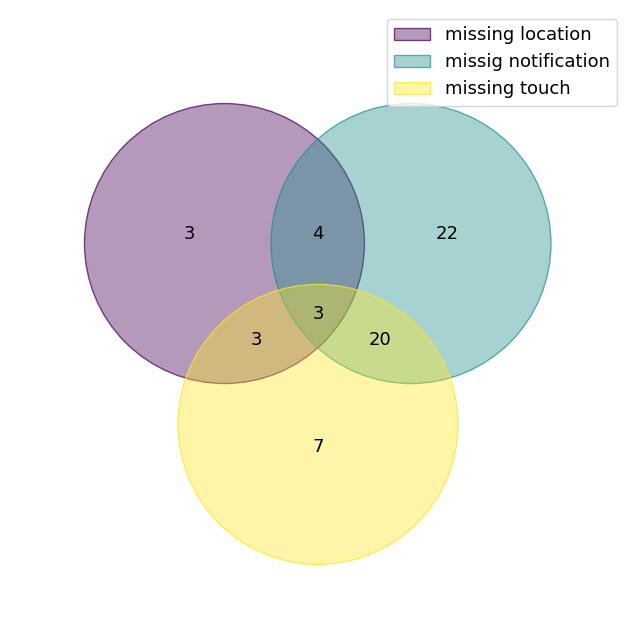

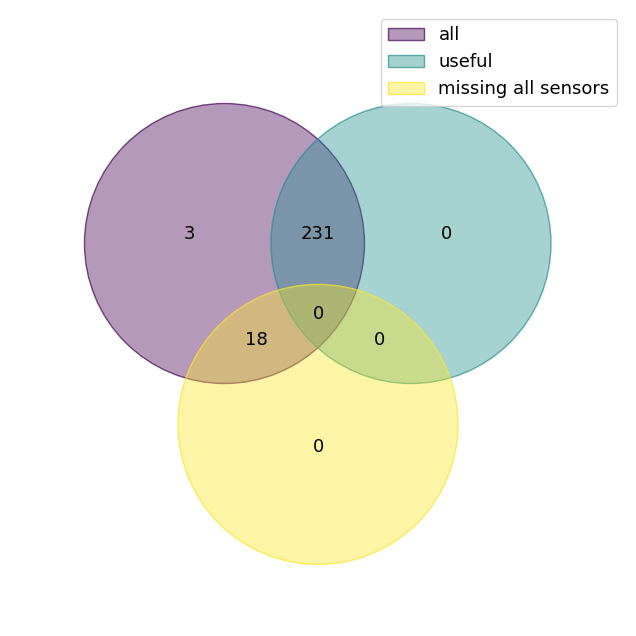

In [113]:
print(len(useful_loc_missing | useful_not_missing | useful_touch_missing), 'users have missing data from at least one sensor')
print(len(useful_not_missing  & useful_touch_missing), 'miss both notification and touch')
venn({'missing location': useful_loc_missing, 'missig notification': useful_not_missing, 'missing touch' : useful_touch_missing})
venn({'all': all_userid, 'useful' : useful_userid, 'missing all sensors' : missing_all_sensors})

# in depth table analysis 
once i have defined the useful users i can now explore which data is missing in the time diaries and socio tables  

## socio

In [33]:
df = pd.read_sql_query("select * from socio", db.connection)


In [34]:
df[df['userid']==261]

,userid,gender,nationality,department,age,degree,Extraversion,Agreeableness,Conscientiousness,Neuroticism,...,Pnormative,Linguistic,Logicmath,Spatial,Bodykines,Musical,Interpersonal,Intrapersonal,Environmental,Spiritual
168,261,Male,Italian,Engineering and Applied Sciences,25-26,MSc,25.0,50.0,62.5,56.25,...,3.5,62.5,56.25,68.75,68.75,62.5,31.25,43.75,58.333332,37.5


## time diary

In [9]:
df = pd.read_sql_query("select * from diary", db.connection)
df = df.loc[df['userid'].isin(useful_userid)]



the data seems complete, there are 1114 records for each users 

In [14]:
#max rows to show
#pd.set_option('display.max_rows', 500)

df[df['first2w'] == 'First two weeks' ].groupby('userid').count().sort_values('userid')
df[df['first2w'] != 'First two weeks' ].groupby('userid').count().sort_values('userid')

,timestamp,first2w,week,what,travel,travel_medium,sport,where,withwho,mood,date,time
userid,,,,,,,,,,,,
0,264,264,264,264,3,3,0,264,264,264,264,264
1,264,264,264,264,0,0,0,264,264,264,264,264
2,264,264,264,264,0,0,0,264,264,264,264,264
3,264,264,264,264,0,0,0,264,264,264,264,264
4,264,264,264,264,4,4,7,264,264,264,264,264
...,...,...,...,...,...,...,...,...,...,...,...,...
261,264,264,264,264,0,0,0,264,264,264,264,264
262,264,264,264,264,6,6,0,264,264,264,264,264
264,264,264,264,264,1,1,0,264,264,264,264,264


## touch 

In [2]:
df = pd.read_sql_query("select * from touch where userid = 234", db.connection)

KeyboardInterrupt: 

In [24]:


df['timestamp'] = pd.to_datetime(df['timestamp'])


<AxesSubplot: xlabel='timestamp'>

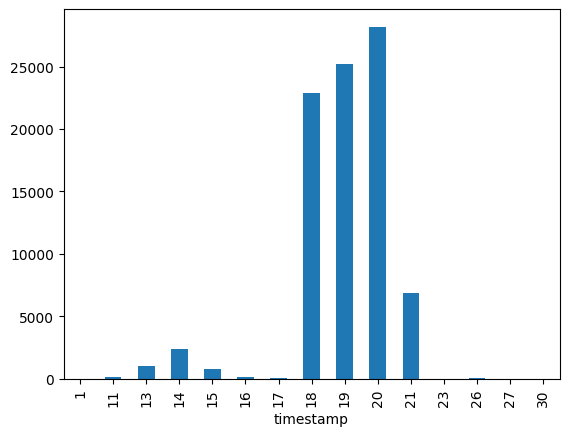

In [34]:
#group the dataframe by hour
# bar plot pandas 

df.groupby(df['timestamp'].dt.day)['userid'].count().plot(kind='bar')



In [ ]:
df.groupby(df['timestamp'].dt.hour)['userid'].count().plot(kind='bar')
df.groupby(df['timestamp'].dt.minute)['userid'].count().plot(kind='bar')

In [37]:
df = pd.read_sql_query("select count(userid) from touch group by strftime( '%H', timestamp) " , db.connection)

<AxesSubplot: >

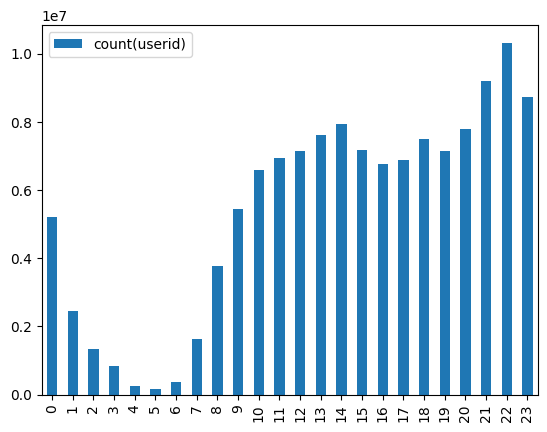

In [39]:
df.plot(kind='bar')

In [5]:
df = pd.read_sql_query("select count(userid) from touch group by strftime( '%H%M', timestamp) " , db.connection)

<AxesSubplot: >

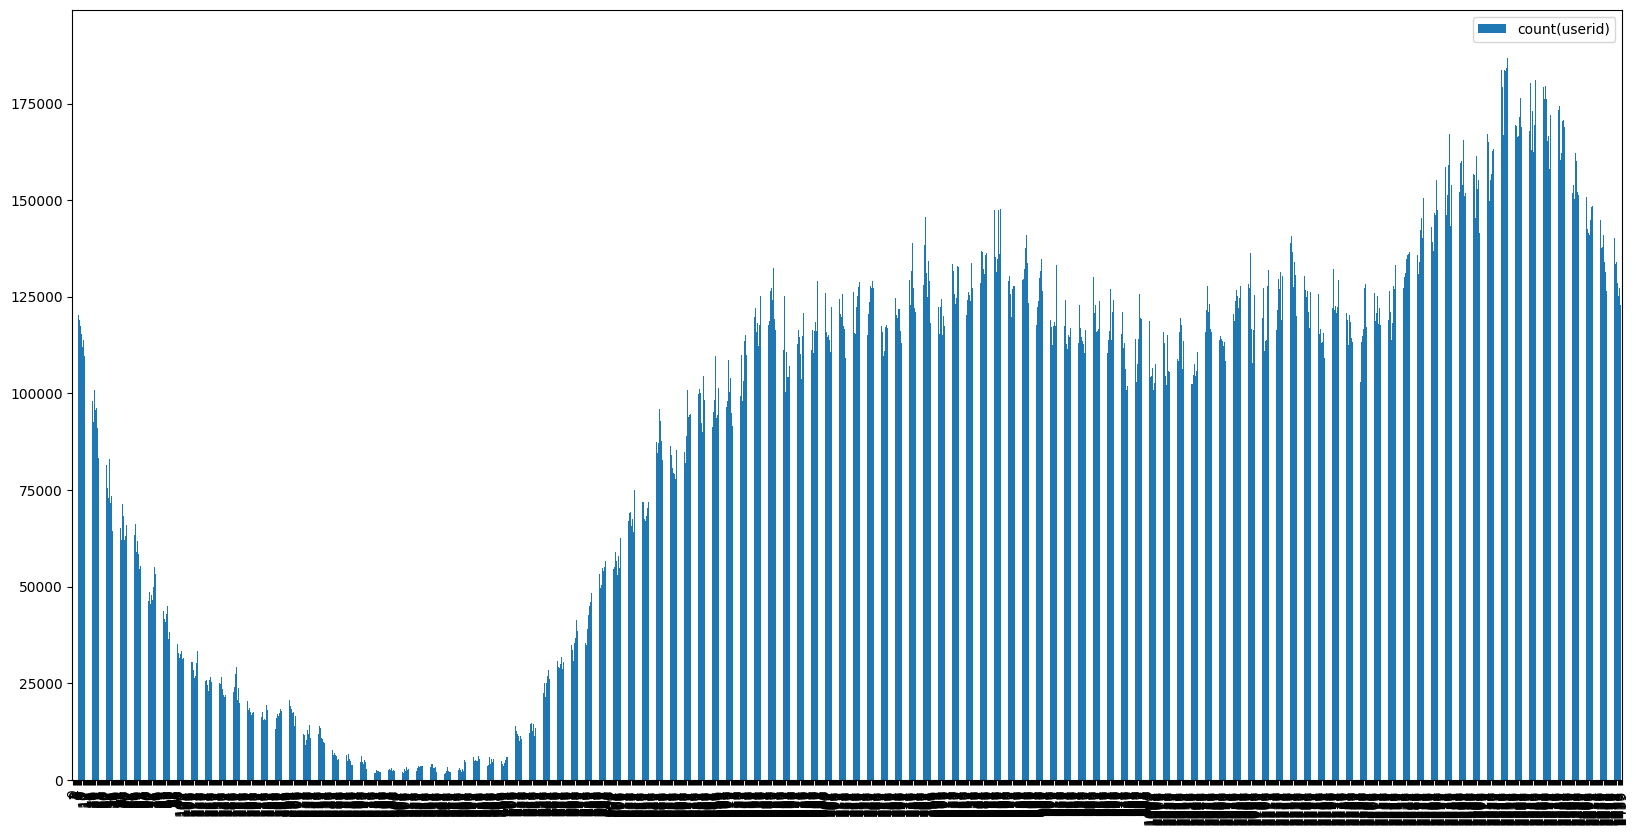

In [7]:
df.plot(kind='bar', figsize=(20,10))

In [17]:
df = pd.read_sql_query("select  strftime( '%m', timestamp) ,strftime( '%d', timestamp), count(distinct userid) from touch group by strftime( '%m', timestamp), strftime( '%d', timestamp) " , db.connection)

<AxesSubplot: xlabel="strftime( '%m', timestamp),strftime( '%d', timestamp)">

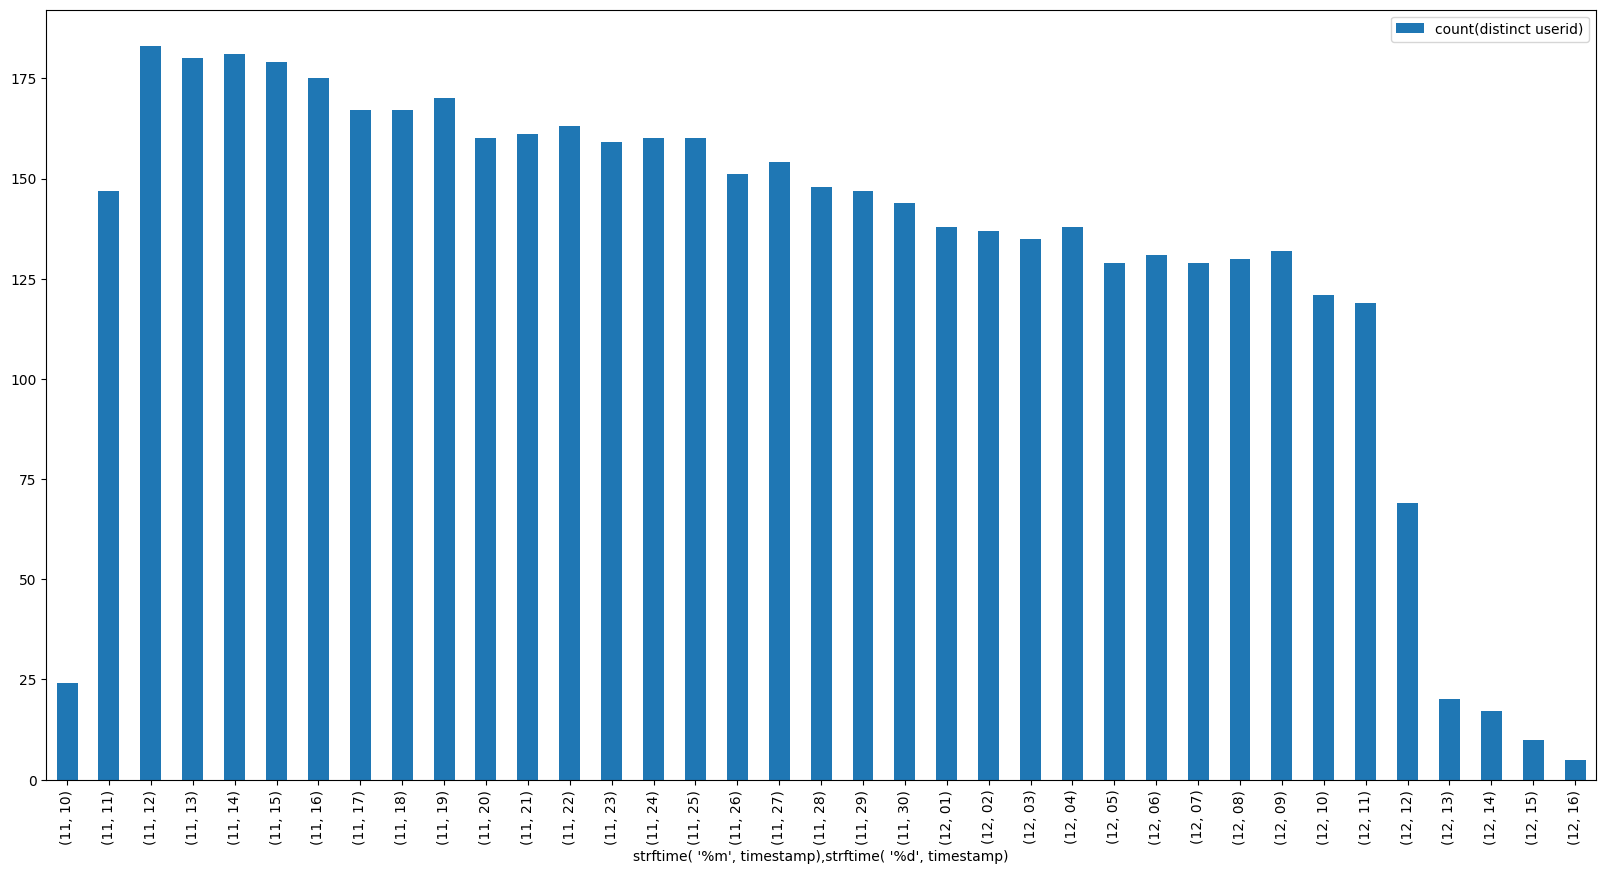

In [18]:
df#.plot( kind='bar',figsize=(20,10))
df.set_index(['strftime( \'%m\', timestamp)','strftime( \'%d\', timestamp)']).plot(kind='bar',figsize=(20,10))

## notification

In [9]:
df = pd.read_sql_query("select  count(nontificationid) from notification group  by userid  " , db.connection)

<AxesSubplot: >

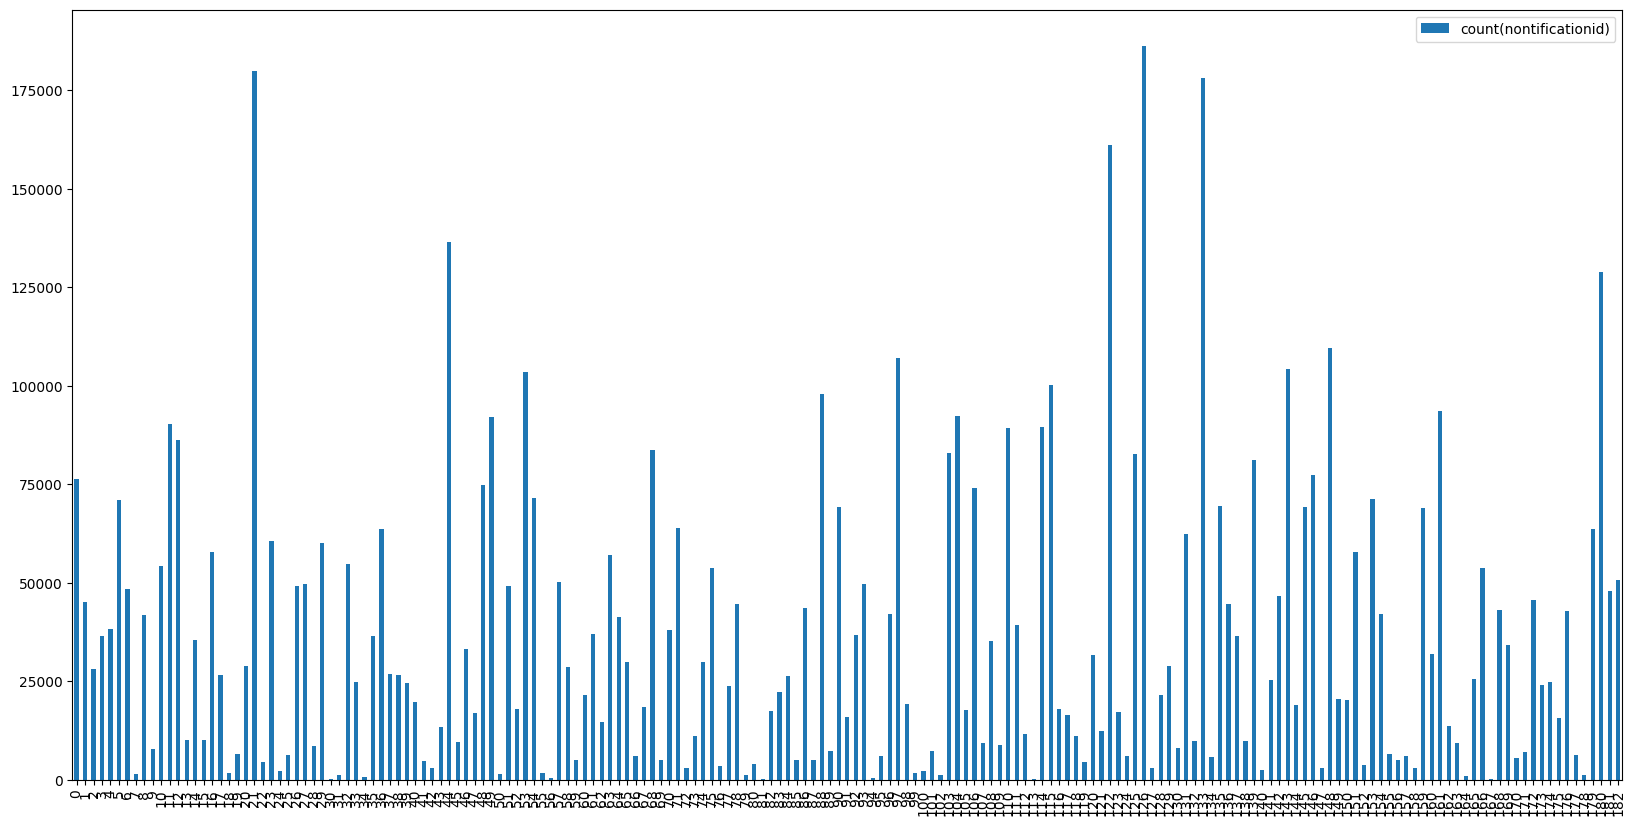

In [11]:
df.plot(kind='bar', figsize=(20,10))
#sort df values 



In [14]:
df = pd.read_sql_query("select  count(nontificationid) from notification group  by strftime( '%H', timestamp)  " , db.connection)

<AxesSubplot: >

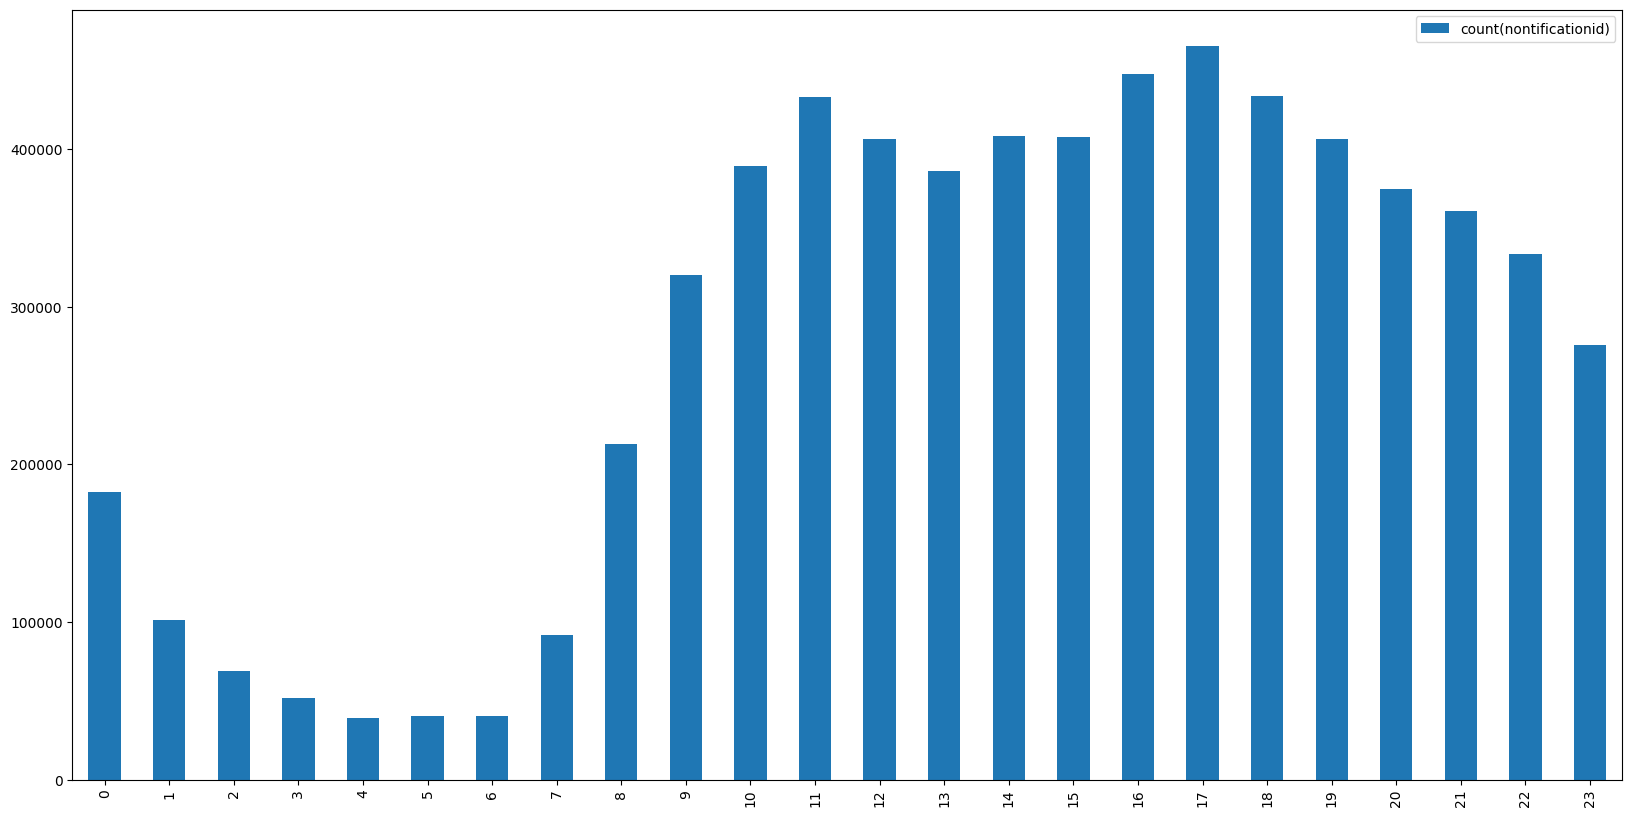

In [15]:
df.plot(kind='bar', figsize=(20,10))

In [16]:
df = pd.read_sql_query("select  count(nontificationid) from notification group  by strftime( '%M', timestamp)  " , db.connection)

<AxesSubplot: >

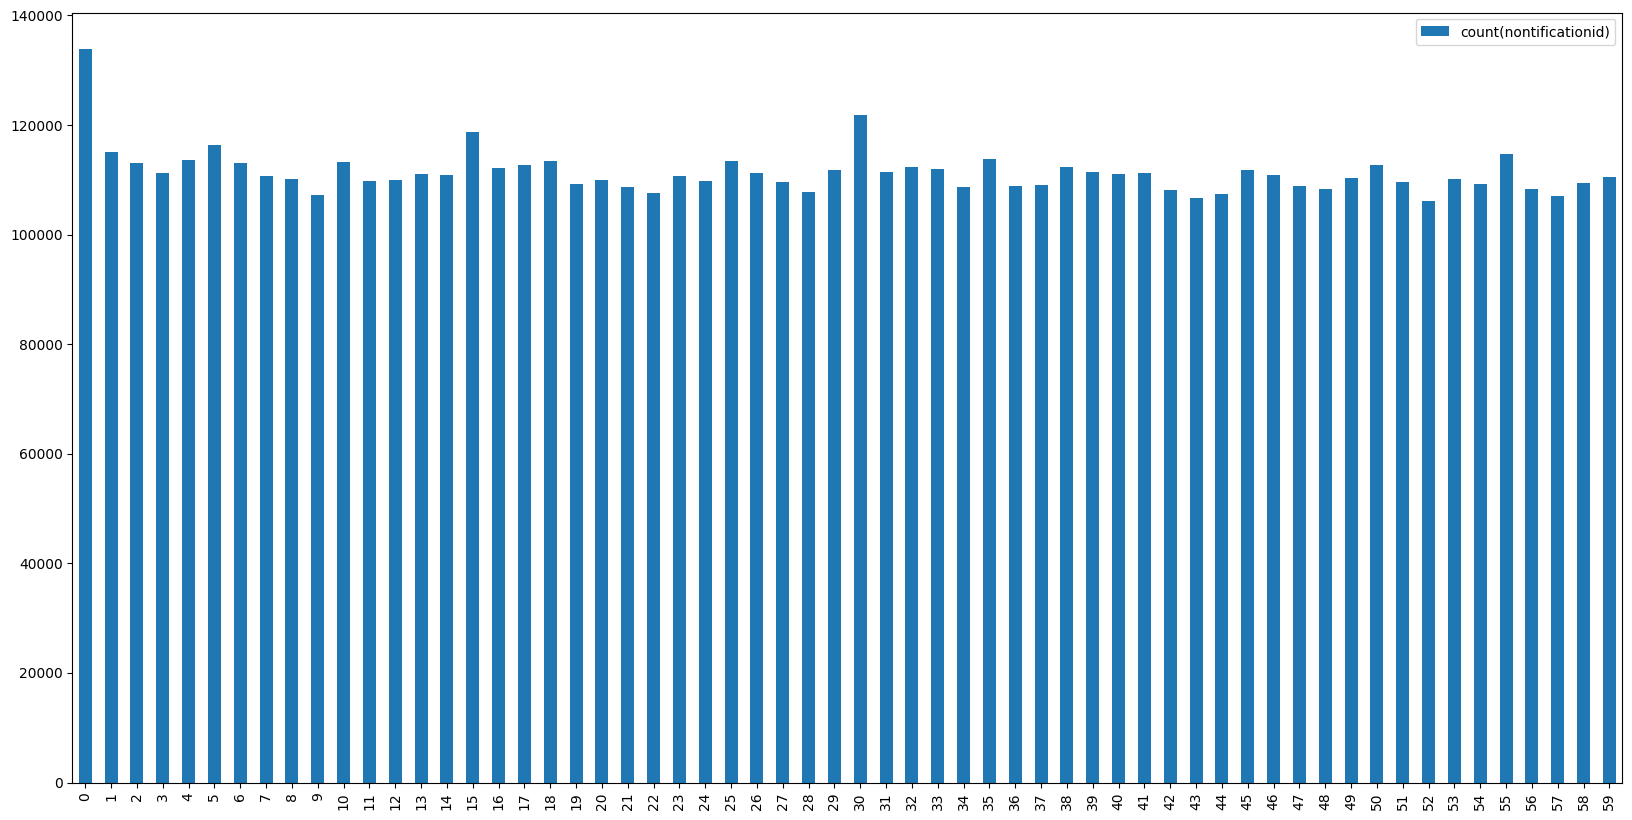

In [17]:
df.plot(kind='bar', figsize=(20,10))

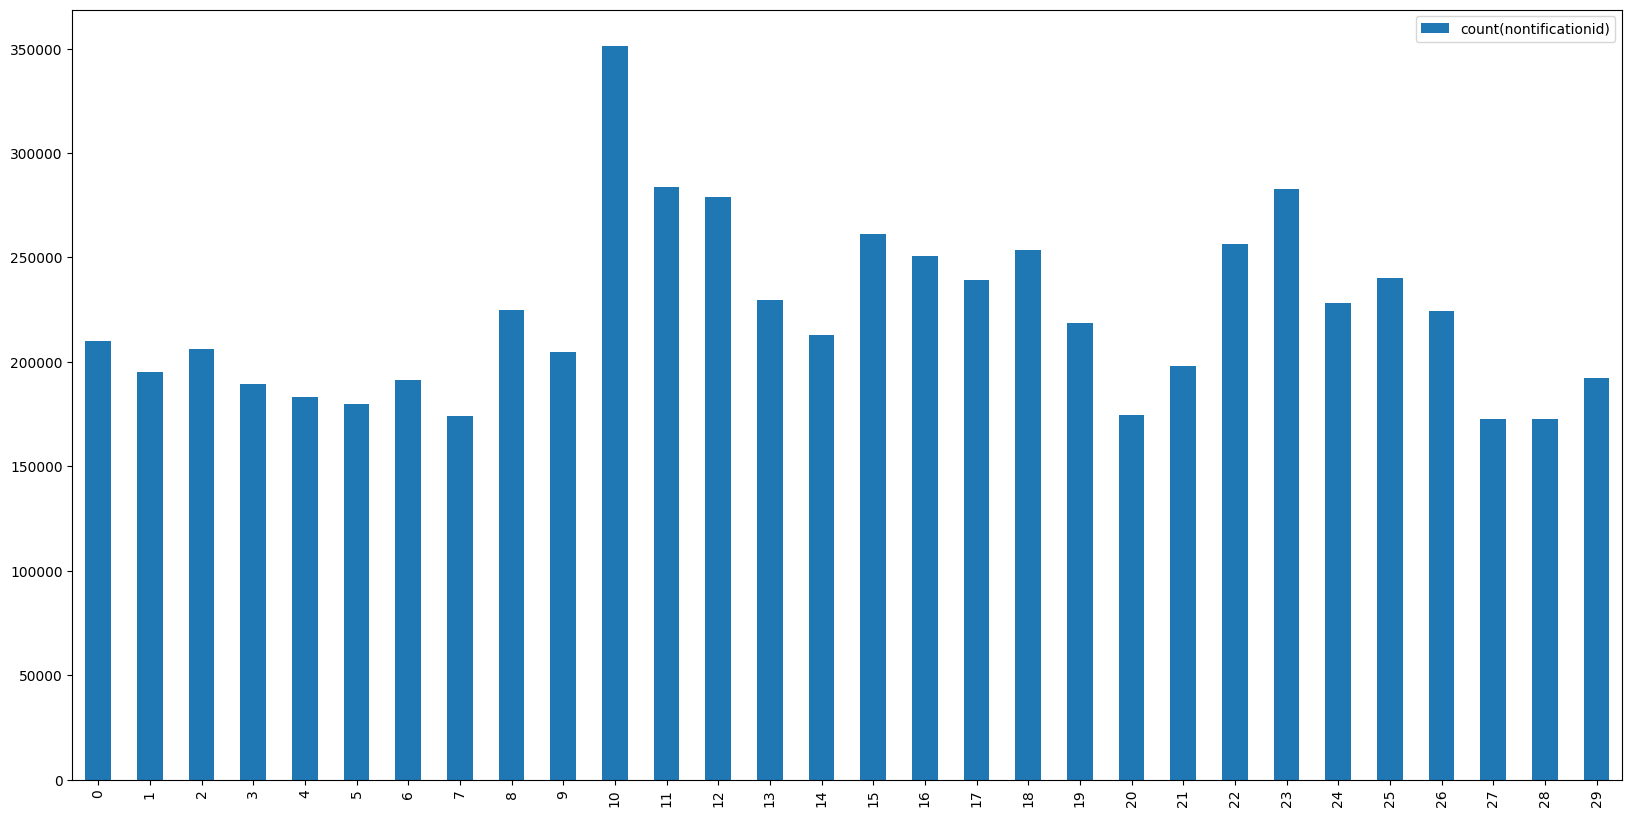

In [19]:
df = pd.read_sql_query("select  count(nontificationid) from notification group  by strftime( '%d', timestamp)  " , db.connection).plot(kind='bar', figsize=(20,10))

## application 

group by date and count how many userd have at least one application, we can see that the numeber of users decrease almost every day  

<AxesSubplot: xlabel='date'>

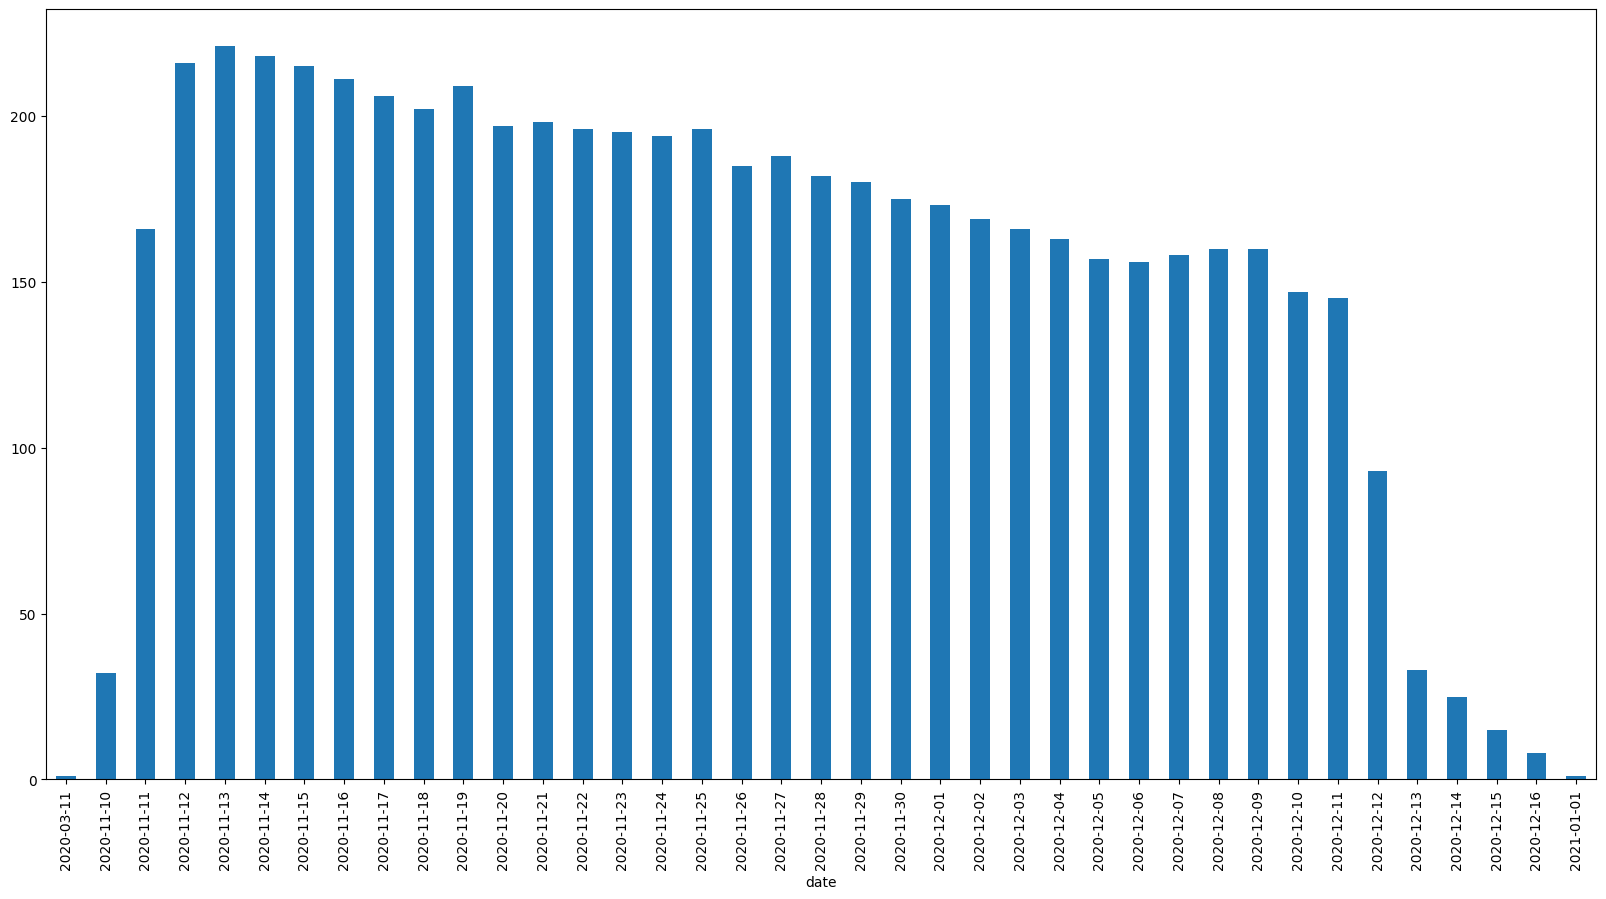

In [108]:
query_app = "select date, count(distinct application) , count(distinct userid) from app where userid in"+ str(tuple(useful_userid))+"group by date " 
df = pd.read_sql_query(query_app, db.connection).sort_values('date')
df.set_index('date')['count(distinct userid)'].plot(kind='bar', figsize=(20,10))


In [122]:
query_app_user = "select userid, count(distinct application) as n_apps, count(distinct date) as n_days  from app where userid in "+ str(tuple(useful_userid))+" group by userid "
df = pd.read_sql_query(query_app_user, db.connection).sort_values('userid')
userid_noapp = set(df[df['n_apps'] == 1]['userid']) # id of users without apps 

print( 'there are '+ str(len(userid_noapp))+ ' users with only one application')


there are 34 users with only one application


### analysis on a specific user 
get all the application excluding android launcher, the empty string, and sensorlog 

get all the application of user 111

In [127]:
query_app = "select userid, date, time, application from app where userid = 111"
#df = pd.read_sql_query(query_app, db.connection).sort_values('date')
df.query('application != "com.huawei.android.launcher" & application != "" & application != "it.unitn.disi.witmee.sensorlog"')


,userid,date,time,application
114633,111,2020-11-10,17:45:45.734000,com.zhiliaoapp.musically
113268,111,2020-11-10,19:39:59.807000,com.sec.android.app.voicenote
113269,111,2020-11-10,19:39:54.788000,com.sec.android.app.voicenote
113270,111,2020-11-10,19:39:49.778000,com.sec.android.app.voicenote
113271,111,2020-11-10,19:39:44.769000,com.sec.android.app.voicenote
...,...,...,...,...
188551,111,2020-12-12,09:34:32.137000,com.sec.android.app.launcher
188550,111,2020-12-12,09:34:37.150000,com.sec.android.app.launcher
188549,111,2020-12-12,09:34:43.113000,com.sec.android.app.launcher
188547,111,2020-12-12,09:34:54.144000,com.sec.android.app.launcher


most used apps of a user 

In [35]:
df.value_counts('application')

application
                                       23190
com.huawei.android.launcher            13816
com.google.android.youtube              7799
com.instagram.android                   4911
org.telegram.messenger                  3015
com.android.chrome                      2090
com.whatsapp                            1916
com.riotgames.legendsofruneterra         830
it.unitn.disi.witmee.sensorlog           715
com.android.incallui                     666
com.duolingo                             296
com.google.android.apps.docs             216
com.adobe.scan.android                   131
com.google.android.gm                    117
com.example.android.notepad               86
com.roidapp.photogrid                     69
com.android.deskclock                     64
com.android.gallery3d                     49
com.habitrpg.android.habitica             49
com.android.settings                      28
com.android.contacts                      20
com.android.vending                       1

## Screen 

<AxesSubplot: xlabel='date'>

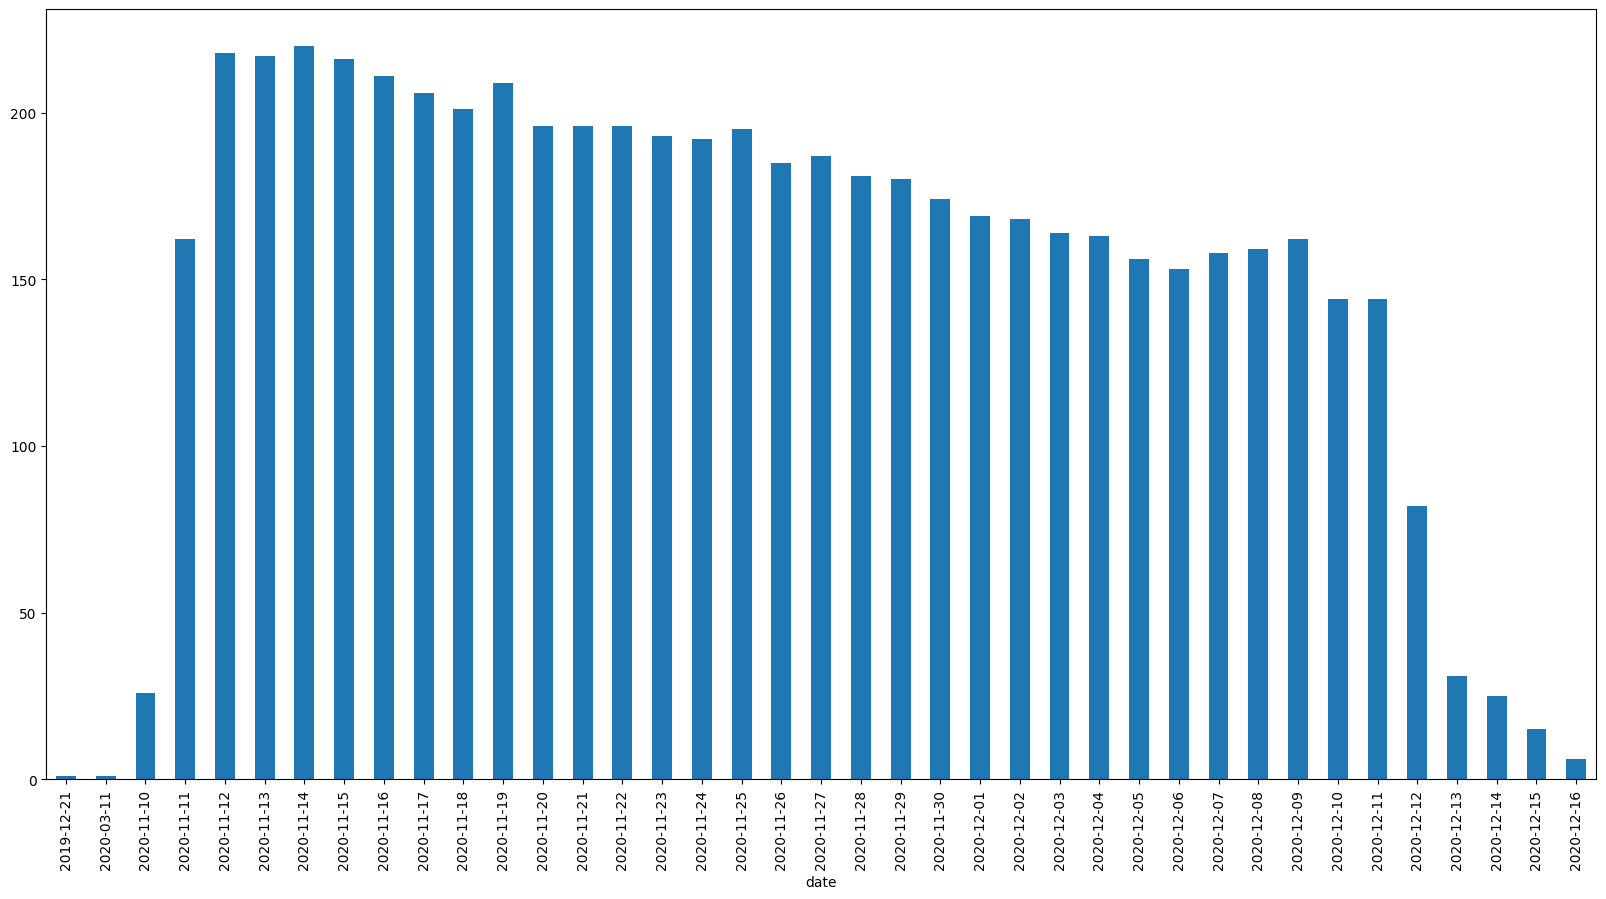

In [130]:
query_screen = "select  date, count(distinct userid) as n_user, status from screen group by date "
df = pd.read_sql_query(query_screen , db.connection)
df.set_index('date')['n_user'].plot(kind='bar', figsize=(20,10))



there are more screen off than screen on

In [133]:
query_screen = "select  status, count(status)from screen group by status "
df = pd.read_sql_query(query_screen , db.connection)
df

,status,count(status)
0,SCREEN_OFF,6963853
1,SCREEN_ON,6626147


In [154]:
query_screen = "select  userid, sum(CASE status WHEN 'SCREEN_ON' then 1 else 0 end) as n_on, sum(CASE status WHEN 'SCREEN_ON' then 0 else 1 end) as n_off from screen group by userid "
#df = pd.read_sql_query(query_screen , db.connection)
df['diff'] =  (df['n_off'] - df['n_on'])
df

,userid,n_on,n_off,diff
0,0,3250,3280,30
1,1,34833,34871,38
2,2,28740,29242,502
3,3,23457,23543,86
4,4,10706,13902,3196
5,5,55930,55988,58
6,6,40242,47056,6814
7,7,2130,2124,-6
8,8,84857,84994,137
9,9,25447,25579,132


## Location

In [19]:
df = pd.read_sql_query("select strftime( '%m', timestamp), strftime( '%d', timestamp), count(distinct userid)from location  group by strftime( '%m', timestamp), strftime( '%d', timestamp)  " , db.connection)

<AxesSubplot: xlabel="strftime( '%m', timestamp),strftime( '%d', timestamp)">

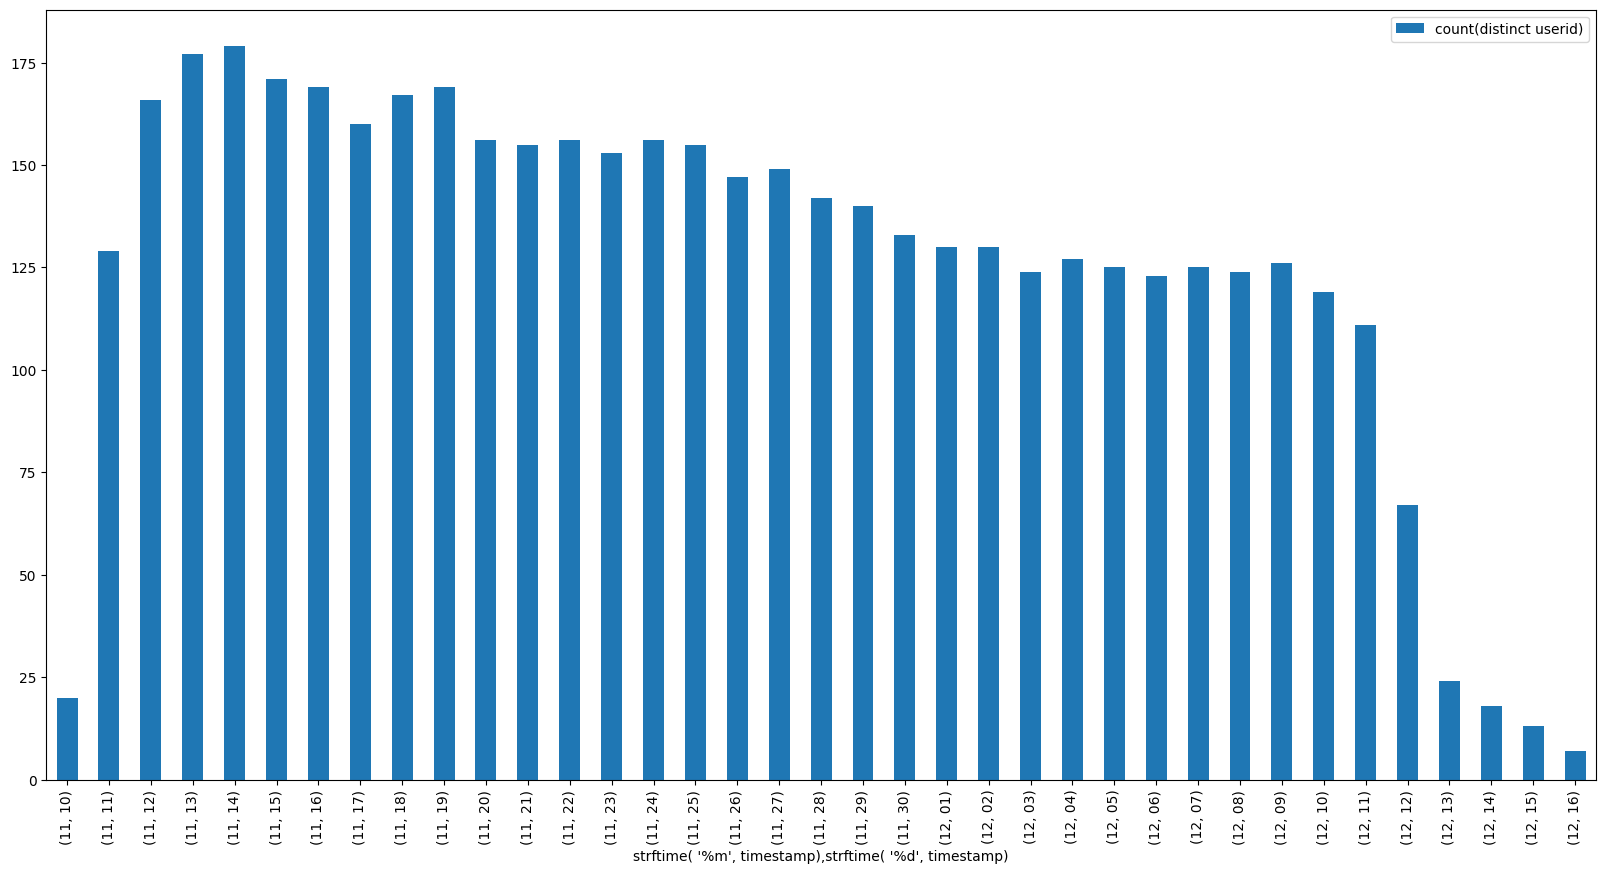

In [21]:
df.set_index(['strftime( \'%m\', timestamp)','strftime( \'%d\', timestamp)']).plot(kind='bar',figsize=(20,10))

In [23]:
df = pd.read_sql_query("select userid, count(timestamp) from location group by userid  " , db.connection)

<AxesSubplot: >

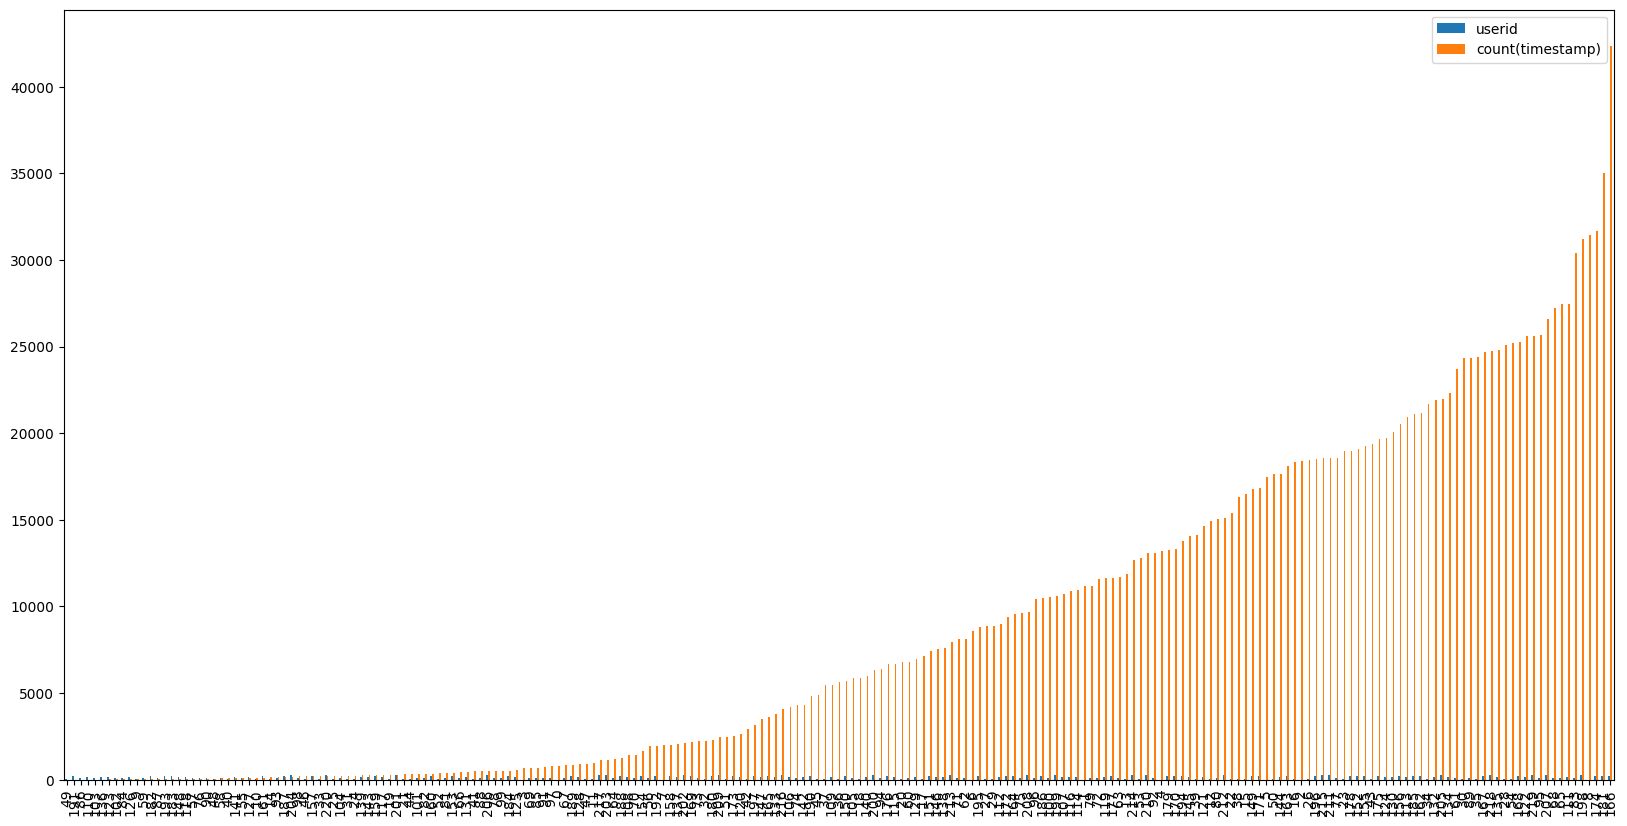

In [26]:
df.sort_values(['count(timestamp)']).plot(kind='bar', figsize=(20,10))

In [41]:
#count  the number of users that have less than 100 entries 
print(df[df['count(timestamp)'] < 100].count()['userid'], 'users have less than 100 entries')
print(df[df['count(timestamp)'] < 1000].count()['userid'], 'users have less than 1000 entries')
print(df[df['count(timestamp)'] < 10000].count()['userid'], 'users have less than 10000 entries')

#  mean 
print(round(df['count(timestamp)'].mean()), '-> mean number of entries per user')


26 users have less than 100 entries
76 users have less than 1000 entries
138 users have less than 10000 entries
8687 -> mean number of entries per user
